In [29]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Reading SPY returns

spy_returns_csv = Path("./spy_data_frame.csv")
spy_hourly_data_df = pd.read_csv(spy_returns_csv, index_col="date", infer_datetime_format=True, parse_dates=True)
spy_hourly_data_df.head(5)

,high,low,open,close,volume
date,,,,,
2019-09-18 15:30:00,301.2200,300.0050,300.005,301.090,10191171
2019-09-18 14:30:00,300.3575,298.5257,298.572,300.022,24600903
2019-09-18 13:30:00,300.5200,298.5700,299.680,298.780,15185359
2019-09-18 12:30:00,300.2450,299.6600,300.155,299.690,3569031
2019-09-18 11:30:00,300.2400,300.0200,300.140,300.150,3181030


In [31]:
spy_hourly_data_df.reset_index(inplace=True)
spy_hourly_data_df['time'] = spy_hourly_data_df['date'].dt.time

spy_hourly_data_df['date_1'] = spy_hourly_data_df['date'].dt.date

spy_hourly_data_df['gain'] = (spy_hourly_data_df['close'] / spy_hourly_data_df['open']) - 1
spy_hourly_data_df.head()

,date,high,low,open,close,volume,time,date_1,gain
0,2019-09-18 15:30:00,301.2200,300.0050,300.005,301.090,10191171,15:30:00,2019-09-18,0.003617
1,2019-09-18 14:30:00,300.3575,298.5257,298.572,300.022,24600903,14:30:00,2019-09-18,0.004856
2,2019-09-18 13:30:00,300.5200,298.5700,299.680,298.780,15185359,13:30:00,2019-09-18,-0.003003
3,2019-09-18 12:30:00,300.2450,299.6600,300.155,299.690,3569031,12:30:00,2019-09-18,-0.001549
4,2019-09-18 11:30:00,300.2400,300.0200,300.140,300.150,3181030,11:30:00,2019-09-18,0.000033


In [32]:
#spy_1530_data_df = spy_hourly_data_df[spy_hourly_data_df.time.isin(["15:30:00"])]
#spy_1530_data_df = spy_hourly_data_df[spy_hourly_data_df['time']=="13:30:00"]
spy_1530_data_df = spy_hourly_data_df.iloc[::7]
spy_1430_data_df = spy_hourly_data_df.iloc[1::7]
spy_1330_data_df = spy_hourly_data_df.iloc[2::7]
spy_1230_data_df = spy_hourly_data_df.iloc[3::7]
spy_1130_data_df = spy_hourly_data_df.iloc[4::7]
spy_1030_data_df = spy_hourly_data_df.iloc[5::7]

In [33]:
spy_1530_data_df.head()

,date,high,low,open,close,volume,time,date_1,gain
0,2019-09-18 15:30:00,301.22,300.005,300.005,301.09,10191171,15:30:00,2019-09-18,0.003617
7,2019-09-17 15:30:00,301.02,300.410,300.435,300.94,6118041,15:30:00,2019-09-17,0.001681
14,2019-09-16 15:30:00,300.31,299.970,300.080,300.16,6585705,15:30:00,2019-09-16,0.000267
21,2019-09-13 15:30:00,301.37,300.930,300.950,301.05,8657614,15:30:00,2019-09-13,0.000332
28,2019-09-12 15:30:00,302.09,301.270,301.960,301.27,8644319,15:30:00,2019-09-12,-0.002285


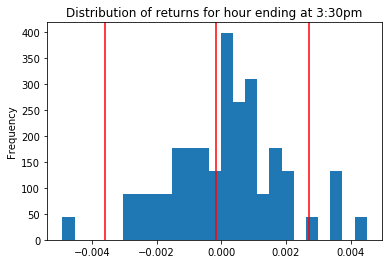

In [34]:
# Plot Distribution of returns for hour ending at 3:30pm
# define confidencce intervals for P10, P50, P90
confidence_interval_1530 = spy_1530_data_df['gain'].quantile(q=[0.1, 0.5, .9])

# Plot Histogram for each of the hours
plt.figure()
histogram_plot = spy_1530_data_df['gain'].plot(kind='hist', bins=25, density=True, title="Distribution of returns for hour ending at 3:30pm")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1HR_1530.png')
histogram_plot

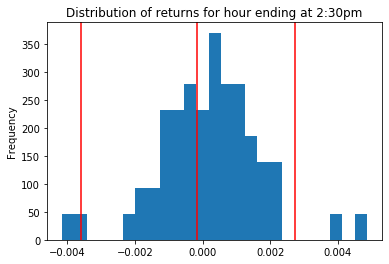

In [35]:
# Plot Distribution of returns for hour ending at 2:30pm
# define confidencce intervals for P10, P50, P90
confidence_interval_1430 = spy_1430_data_df['gain'].quantile(q=[0.1, 0.5, .9])

# Plot Histogram for each of the hours
plt.figure()
histogram_plot = spy_1430_data_df['gain'].plot(kind='hist', bins=25, density=True, title="Distribution of returns for hour ending at 2:30pm")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1HR_1430.png')
histogram_plot

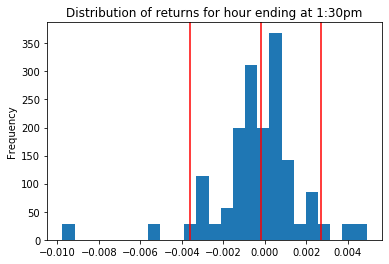

In [36]:
# Plot Distribution of returns for hour ending at 1:30pm
# define confidencce intervals for P10, P50, P90
confidence_interval_1330 = spy_1330_data_df['gain'].quantile(q=[0.1, 0.5, .9])

# Plot Histogram for each of the hours
plt.figure()
histogram_plot = spy_1330_data_df['gain'].plot(kind='hist', bins=25, density=True, title="Distribution of returns for hour ending at 1:30pm")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1HR_1330.png')
histogram_plot

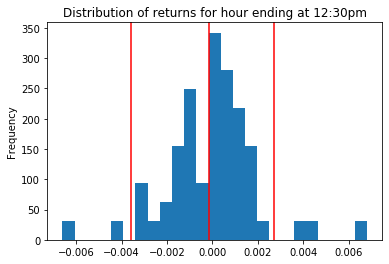

In [37]:
# Plot Distribution of returns for hour ending at 12:30pm
# define confidencce intervals for P10, P50, P90
confidence_interval_1230 = spy_1230_data_df['gain'].quantile(q=[0.1, 0.5, .9])

# Plot Histogram for each of the hours
plt.figure()
histogram_plot = spy_1230_data_df['gain'].plot(kind='hist', bins=25, density=True, title="Distribution of returns for hour ending at 12:30pm")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1HR_1230.png')
histogram_plot

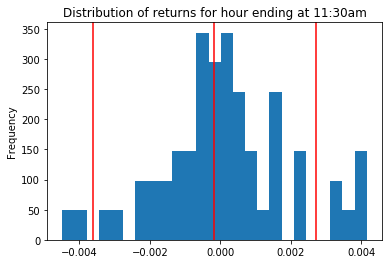

In [38]:
# Plot Distribution of returns for hour ending at 11:30am
# define confidencce intervals for P10, P50, P90
confidence_interval_1130 = spy_1130_data_df['gain'].quantile(q=[0.1, 0.5, .9])

# Plot Histogram for each of the hours
plt.figure()
histogram_plot = spy_1130_data_df['gain'].plot(kind='hist', bins=25, density=True, title="Distribution of returns for hour ending at 11:30am")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1HR_1130.png')
histogram_plot

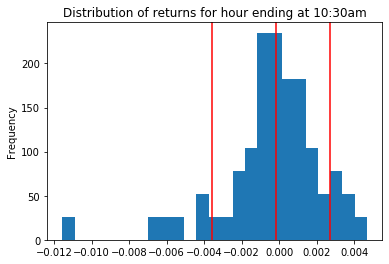

In [39]:
# Plot Distribution of returns for hour ending at 10:30am
# define confidencce intervals for P10, P50, P90
confidence_interval_1030 = spy_1030_data_df['gain'].quantile(q=[0.1, 0.5, .9])

# Plot Histogram for each of the hours
plt.figure()
histogram_plot = spy_1030_data_df['gain'].plot(kind='hist', bins=25, density=True, title="Distribution of returns for hour ending at 10:30am")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1HR_1030.png')
histogram_plot

In [47]:
P50_Each_Hour = {}
P50_Each_Hour["1030"] = confidence_interval_1030[0.5]
P50_Each_Hour["1130"] = confidence_interval_1130[0.5]
P50_Each_Hour["1230"] = confidence_interval_1230[0.5]
P50_Each_Hour["1330"] = confidence_interval_1330[0.5]
P50_Each_Hour["1430"] = confidence_interval_1430[0.5]
P50_Each_Hour["1530"] = confidence_interval_1530[0.5]
P50_Each_Hour

# Best P50 is for hour ending at 1530
# Worst P50 is for hour ending at 1230

{'1030': -0.0001744232086126063,
 '1130': 3.331778503357086e-05,
 '1230': 9.344422479906633e-05,
 '1330': -0.00022527485139900438,
 '1430': 0.0002651552431259807,
 '1530': 0.0002747263824548485}

In [51]:
avg_hourly_returns =  spy_1530_data_df['gain'].mean()
std_dev_hourly_returns = spy_1530_data_df['gain'].std()

num_trading_days = 30
num_simulations = 200
spy_1530_last_price = spy_1530_data_df['close'][0]
monte_carlo_1HR_1530 = pd.DataFrame()
for n in range(num_simulations):
   simulated_spy_prices = [spy_1530_last_price]
   for i in range(num_trading_days):
       simulated_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_hourly_returns, std_dev_hourly_returns))
       simulated_spy_prices.append(simulated_price)
   monte_carlo_1HR_1530[f"Simulation {n+1}"] = pd.Series(simulated_spy_prices)
monte_carlo_1HR_1530.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 191,Simulation 192,Simulation 193,Simulation 194,Simulation 195,Simulation 196,Simulation 197,Simulation 198,Simulation 199,Simulation 200
0,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,...,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000,301.090000
1,300.270053,300.469905,301.019012,301.270255,301.295483,300.681066,301.474065,300.529917,301.643764,301.978193,...,301.519385,301.215024,300.678440,301.211808,300.781324,301.757973,300.553999,301.715870,300.368948,300.678310
2,300.367439,300.257936,301.003967,301.670448,301.623240,301.265066,301.310865,299.806013,300.858785,301.956276,...,302.016110,301.109681,300.617813,301.335886,301.195008,301.054674,301.131348,301.943188,300.224651,301.465992
3,300.656629,300.825553,301.507447,301.579866,302.219551,302.058178,301.014386,299.102144,301.101886,301.862246,...,302.620804,301.217952,300.874697,301.488973,300.607704,301.158924,301.245897,301.693461,299.631811,301.631599
4,300.558160,301.715471,300.975081,301.546257,303.003117,302.662970,300.692786,298.956673,300.577160,301.176770,...,302.077589,301.110508,301.348782,301.510635,301.019344,300.918717,301.842240,301.566894,298.971779,302.056312


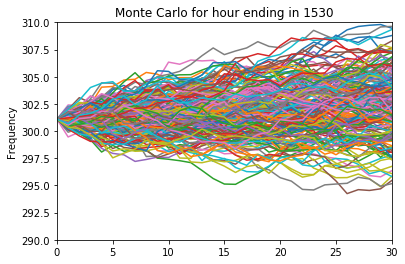

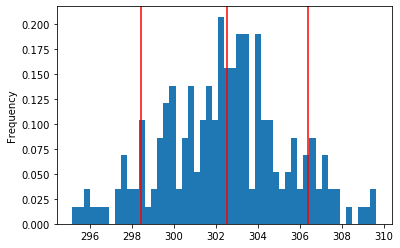

In [56]:
monte_carlo_plot = monte_carlo_1HR_1530.plot(legend = None, title="Monte Carlo for hour ending in 1530")
plt.savefig('Hourly_Monte_Carlo_Plot_1530.png')
monte_carlo_plot

ending_cumulative_returns = monte_carlo_1HR_1530.iloc[-1, :]
ending_cumulative_returns.plot(kind='hist', bins = 50, ylim=(290, 310))
confidence_interval = ending_cumulative_returns.quantile(q=[0.1, 0.5, .9])
confidence_interval
plt.figure();
histogram_plot = ending_cumulative_returns.plot(kind='hist', density=True, bins=50, title="Distribution of Final Price for 1530")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1530.png')

In [65]:
avg_hourly_returns =  spy_1230_data_df['gain'].mean()
std_dev_hourly_returns = spy_1230_data_df['gain'].std()

num_trading_days = 30
num_simulations = 200
spy_1230_last_price = spy_1230_data_df['close'][3]
monte_carlo_1HR_1230 = pd.DataFrame()
for n in range(num_simulations):
   simulated_spy_prices = [spy_1230_last_price]
   for i in range(num_trading_days):
       simulated_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_hourly_returns, std_dev_hourly_returns))
       simulated_spy_prices.append(simulated_price)
   monte_carlo_1HR_1230[f"Simulation {n+1}"] = pd.Series(simulated_spy_prices)
monte_carlo_1HR_1230.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 191,Simulation 192,Simulation 193,Simulation 194,Simulation 195,Simulation 196,Simulation 197,Simulation 198,Simulation 199,Simulation 200
0,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,...,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000,299.690000
1,299.278472,299.642669,299.492233,299.960218,300.022373,300.732982,300.483367,299.518824,299.719990,299.327893,...,299.525513,300.001909,300.038369,298.446778,300.624759,299.266204,300.060439,299.656577,299.510072,299.438386
2,298.949200,300.937255,299.516568,298.968235,300.059387,300.820129,300.549914,298.860087,299.911270,299.443031,...,298.353011,300.273753,299.286867,297.948577,300.115294,298.910784,299.876054,300.173940,299.280639,299.648448
3,297.519640,300.751820,298.500637,299.490014,298.678769,300.823331,300.941064,299.609158,299.764720,298.597372,...,298.293491,300.405493,299.765131,297.264523,300.188114,297.371769,299.201896,300.659662,299.745268,299.883364
4,297.526324,300.490313,297.694779,299.598555,299.825474,300.890374,301.443455,299.298602,299.480719,298.099164,...,298.973042,299.860235,299.411905,296.707684,300.561602,297.113736,299.403946,299.914206,300.526801,300.037373


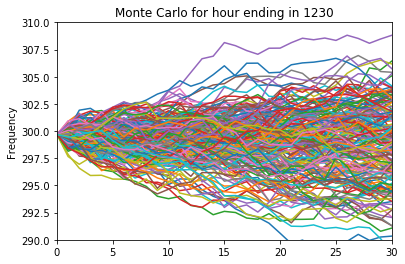

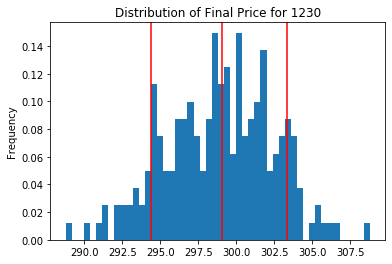

In [67]:
monte_carlo_plot = monte_carlo_1HR_1230.plot(legend = None, title="Monte Carlo for hour ending in 1230")
plt.savefig('Hourly_Monte_Carlo_Plot_1230.png')
monte_carlo_plot

ending_cumulative_returns = monte_carlo_1HR_1230.iloc[-1, :]
ending_cumulative_returns.plot(kind='hist', bins = 50, ylim=(290, 310))
confidence_interval = ending_cumulative_returns.quantile(q=[0.1, 0.5, .9])
confidence_interval
plt.figure();
histogram_plot = ending_cumulative_returns.plot(kind='hist', density=True, bins=50, title="Distribution of Final Price for 1230")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')
plt.axvline(confidence_interval.iloc[2], color='r')
plt.savefig('Confidence_Interval_Histogram_Plot_1230.png')
# histogram_plot